# Introduction to Kepler & TESS Data

The data from the Kepler mission is freely available from the [NASA website]( https://exoplanetarchive.ipac.caltech.edu/). 

Obtaining TESS data is a bit more difficult, but we have provided you with data from Kepler and TESS for a number of exoplanet systems in the directory ```Data```. 

Here you can get familiar with how to plot and analyse the data using an example from Kepler.

## Reading in the data
We will be using the same method of reading data as demonstrated in the notebook ```GettingToKnowPython.ipynb```. First, we load all the libraries we need before we get started.

In [21]:
import numpy as np
import matplotlib.pyplot as plt
##magic command to get interactive plots working in notebooks
%matplotlib notebook

As described above, some light curves are already available in the  ```./Data``` directory.

For this example we will use ```KIC006922244.tbl```. Feel free to take a look in the data file by double clicking on it. 

To read in the 3 columns of the file we will use ```np.loadtxt``` skipping the 3 rows of header by using ```skiprows=3```

In [22]:
z, t, flux = np.loadtxt("Data/KIC006922244.tbl",unpack=True,skiprows=3)

The first column in the data file is read into the NumPy array ```z``` and is not of interest to us, so we ignore it. 

The second column contains the time at which the measurement was taken, measured in units of days since 12:00 on 1st January 2009. 

The third column contains the luminosity of the star as observed by the Kepler spacecraft using funny units. The data in this column can be expressed as 
$$\left(\frac{L(t)-L_*}{L_*}\right)$$
where $L(t)$ is the luminosity measured at time $t$, and $L_*$ is the average luminosity of the star when no transit by a planet is occurring. In other words, the data in this column measures the fractional change in the brightness of the star relative to its average intrinsic brightness.

**Please note that we may use the words "luminosity", "flux" and "brightness" interchangeably when discussing how the measured brightness of a star changes!**

Let's look at what our data looks like by plotting ```t``` against ```flux```.

<IPython.core.display.Javascript object>


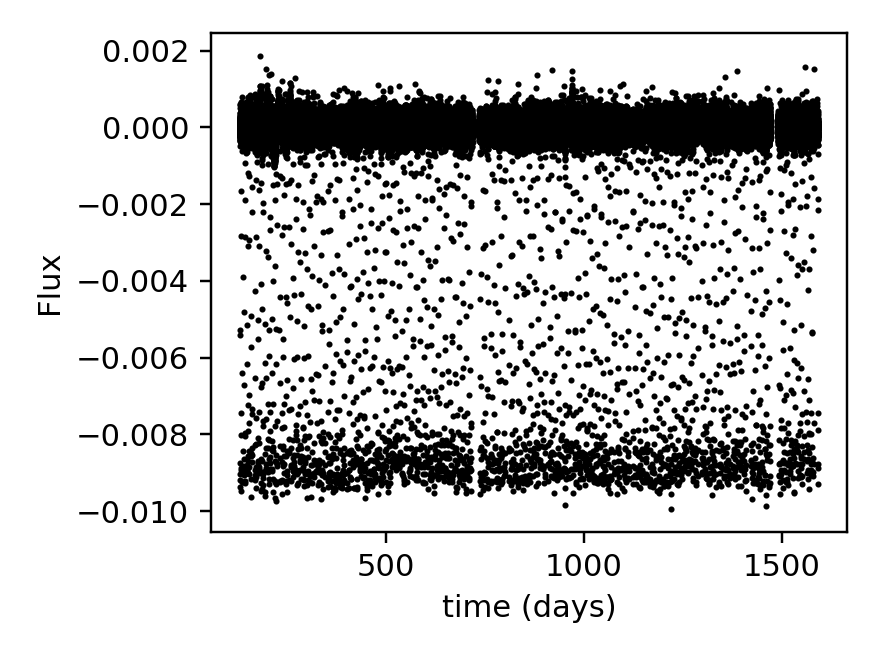

In [23]:
plt.figure(figsize=(4,3))
plt.plot(t,flux,'k.',markersize=2)
plt.xlabel("time (days)")
plt.ylabel("Flux")
plt.tight_layout()

Well, that looks good! We now have a plot of all the luminosity versus time data collected on this object by the Kepler spacecraft. 

The data has been processed using a technique known as detrending, which removes any long term variability caused by changes in the responsiveness of the spacecraft's detector over time. 

The definition of the flux given above also explains why the data is centred around ${\rm Flux}=0$. 

The dips in the lightcurve where Flux goes down to values of approximately -0.01 are the transits due to the planet passing in front of the star. 

### Analysing the transits

**We very strongly recommend using the following _Classical Jupyter Notebook_ approach to analysing the transits!** 

When you first enter CoCalc and open a notebook it will usually open using the _default CoCalc notebook_ style. If this is the case the top left of your browser tab will look something like this:
<img src="./notebookFigures/CoCalcFileMenu.png" alt="Drawing" style="width: 300px;"/>
We want to change the notebook style to the _Classical Jupyter Notebook style_, because this will allow us to use interactive plots that are not available in the default CoCalc notebooks. Click on the File menu as shown by the red arrow and select the option "Switch to classical notebook..." Wait for a minute and the notebook appearance should change to looking something like this: <img src="./notebookFigures/ClassicalFileMenus.png" alt="Drawing" style="width: 300px;"/>


Now you should be able to create interactive plots, and this is going to be essential for analysing the Kepler data.

The dips that can be seen in the above plot that shows the Kepler data for the system KIC00692244 are the exoplanet transits. 

We can take a closer look by using the zoom tool in our interactive plot. The zoom tool is illustrated in the figure below. 

Click on the zoom button and then drag your cursor across the plot to define the region you want to zoom into.

<br>

 <img src="./notebookFigures/zoomTool.png" alt="Drawing" style="width: 400px;"/> 

<br>
 
Zooming into just a few transits the lightcurve looks like this - now we can easily see the individual transits:

<img src="./notebookFigures/Zoomed.png" alt="Drawing" style="width: 500px;"/> 

Then by moving your mouse around on the screen you can narrow down the coordinates of each transit. 

The orbital period of the planet is just the time interval between adjacent transits. To estimate the orbital period, use the mouse to determine the times of the midpoints of two neighbouring transits (using the zooom function to do this as accurately as possible). The orbital period is the difference between these midpoints. 

To get a more accurate estimate of the orbital period we recommend taking the average of a few estimated periods obtained by looking at a number of neighbouring transits.

Why not have a go at using the zoom function on the interactive plot we made earlier on in this notebook? (note you may need to re-execute the code cell to see it!)

## Phase folding
We have now read the data, plotted it and have estimated the orbital period. 

You will have seen that the number of data points contained in each transit is small, because the Kepler spacecraft only recorded data every 30 minutes. A typical transit lasts for a few hours, so the data coverage of an individual transit is very sparse. 

To get a smooth lightcurve that we can use to determine the properties of a planet we need to perform an operation called phase folding. Phase folding is an operation where periodic data is folded over on itself at the right interval (i.e. the period), so that we end up with what looks like a single transit with the gaps filled in by the data points.

This is done with a modulo operation on the $t$ coordinate,
\begin{equation}
t\rightarrow t \: \mathrm{mod} \: P
\end{equation}
where $P$ is the period of the data. 

Before we phase fold the Kepler data, let's test this idea by generating some very sparse periodic data that mimics a Kepler light curve then phase fold it. Don't worry about trying to understand the code that generates the synthetic data!

<IPython.core.display.Javascript object>


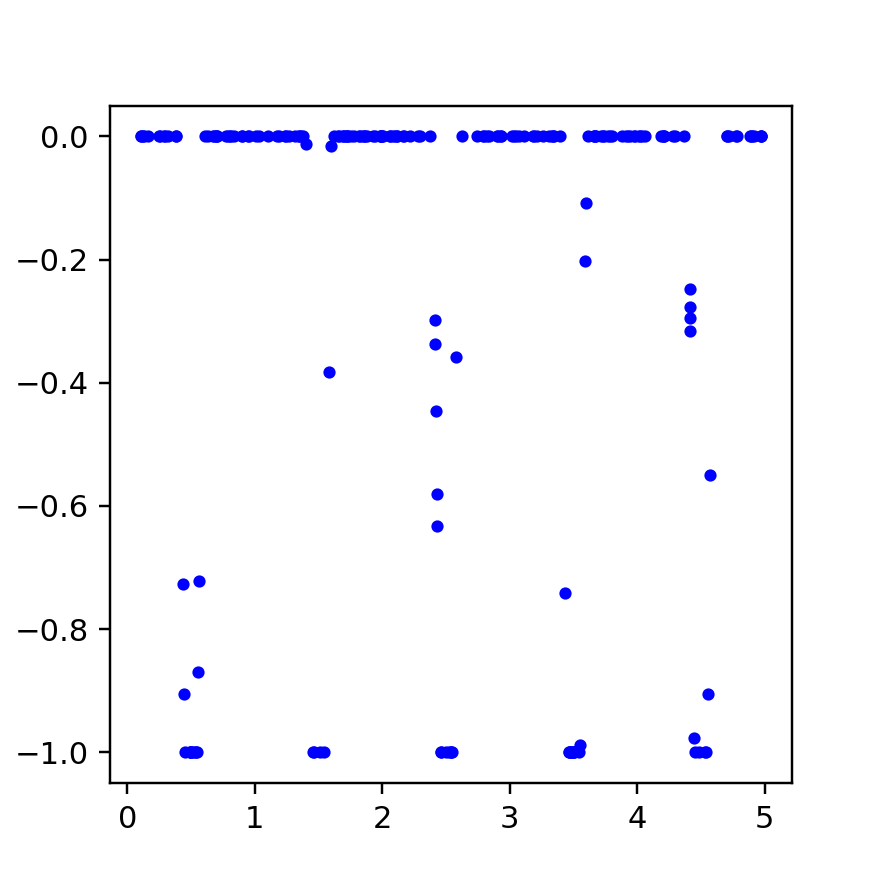

In [24]:
# Here we generate 200 random data points
# that mimic how a transit light curve might look
# We store the time data in an array t2 and
# the flux data in an array y.
ndata=200
t2=np.sort(5.*np.random.rand(ndata))
y=np.zeros(ndata,dtype=float)
gradient=-20.
for i in range (0,ndata):
    if (t2[i]%1>=0.4) and (t2[i]%1 <=0.45):
        y[i]=0.+gradient*(t2[i]%1-0.4)
    elif (t2[i]%1>=0.55) and (t2[i]%1 <=0.60):
        y[i]=0.+gradient*(0.6-t2[i]%1)
    elif (t2[i]%1>0.45) and (t2[i]%1 <=0.55):
        y[i]=-1.
    else:
        y[i]=0.
plt.figure(figsize=(4,4))
plt.plot(t2,y,'b.')

As you can see, the sparse data is difficult to identify as a periodic signal. Let's replot it and draw a dotted line to guide the eye. 

<IPython.core.display.Javascript object>


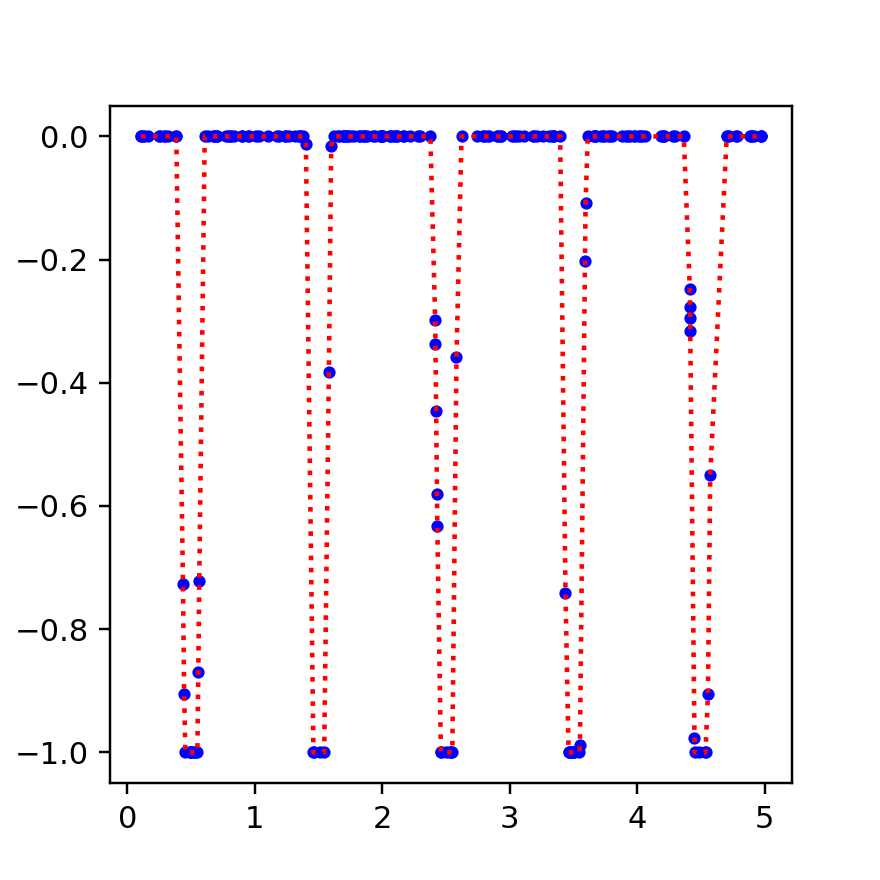

In [25]:
plt.figure(figsize=(4,4))
plt.plot(t2,y,'b.')
plt.plot(t2,y,'r:')

Now we can see the data looks to be periodic. By-eye inspection suggests the y-values vary between 0.0 and -1.0 with the minima being centred on the values t=0.5, 1.5, 2.5, 3.5,... Hence, it appears that the period $P=1.0$. 

Let's use the python modulo operator to phase fold the data and then plot $t\: \mathrm{mod} \: P $ against $y$.

<IPython.core.display.Javascript object>


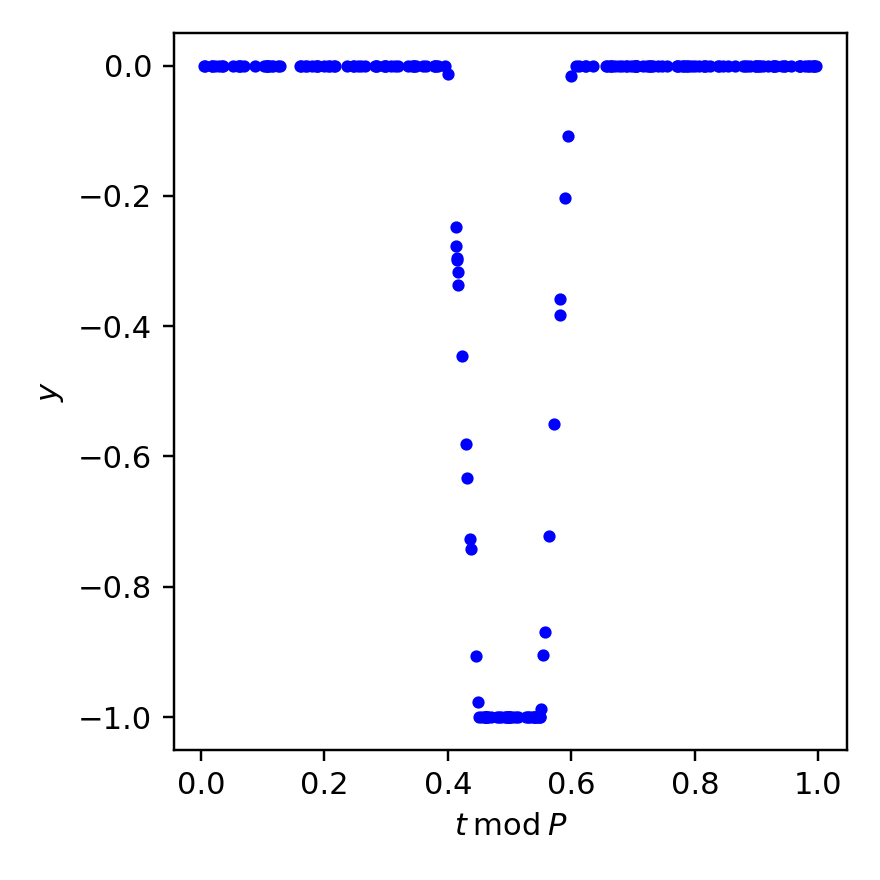

In [26]:
P=1.0
tPhaseFolded=t2%P

plt.figure(figsize=(4,4))
plt.plot(tPhaseFolded,y,'b.')
plt.xlabel("$t\:\mathrm{mod}\: P$")
plt.ylabel("$y$")
plt.tight_layout()
plt.show()

**That looks better!** Now we can easily see the shape of the synthetic light curve.

Sometimes, though, we do not know the exact period, and a small error in the period can lead to a funny looking phase fold so, if you get a fuzzy looking line try changing your period estimate up and down by small amounts. 

This can be tedious and a bit annoying, but when you get a good enough period estimate all the points will align nicely and a clean transit signal will emerge. 

In the cell below I shift the period estimate towards and away from the correct period so you can see what this looks like.

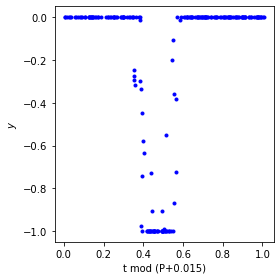

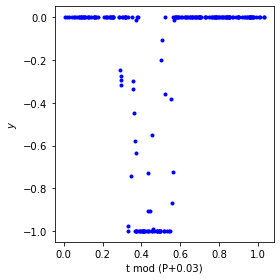

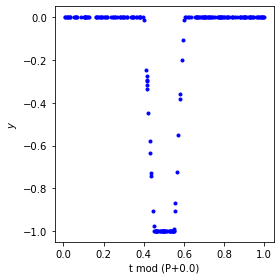

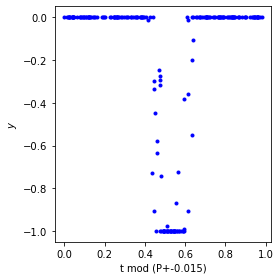

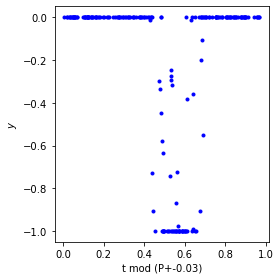

In [27]:
# Executing this cell will output several plots
# We switch off the interactive plots to make things look neater.
%matplotlib inline
for i in [0.015,0.03,0.0,-0.015,-0.03]:
    tPhaseFolded=t2%(P+i)

    plt.figure(figsize=(4,4))
    plt.plot(tPhaseFolded,y,'b.')
    #plt.xlabel("$t\:\mathrm{mod}\: P$"+"("+str(i)+")")
    xstring="t mod (P+"+str(i)+")"
    plt.xlabel(xstring)
    plt.ylabel("$y$")
    plt.tight_layout()
    plt.show()

Clearly only one of the above plots shows a nice phase folded lightcurve! 

**Be aware of the need to obtain an accurate estimate of the orbital period of the planet when you are analysing transit light curves and phase folding them!**

### Centering the transit
Once you have managed to get a good phase fold we will need to center our transit at t=0 with 0 in the middle of our plot. Doing this will make the data esier to read and analyse.

Let's look at our example again, and say we want to move the minimum to 0 in the centre of our plot. 

By-eye inspection tells us that once we have phase folded we need to subtract P/2 from the values along the x-axis.

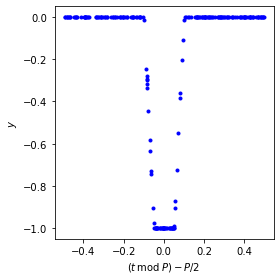

In [28]:
tPhaseFolded=(t2%P)-P/2. # subtract or add to X to move your function along the x axis
plt.figure(figsize=(4,4))
plt.plot(tPhaseFolded,y,'b.')
plt.xlabel("$(t\:\mathrm{mod}\: P) - P/2.$")
plt.ylabel("$y$")
plt.tight_layout()
plt.show()

I have already phase folded KIC006922244 so you can have an idea what the finished product will more or less look like. The data is in the file ```Data/KIC006922244_phaseFold.dat```. 

Here it is plotted: 

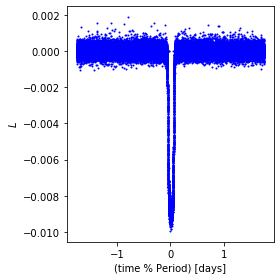

In [29]:
# %matplotlib notebook
t_pf, flux2 = np.loadtxt("Data/KIC006922244_phaseFold.dat",unpack=True)
plt.figure(figsize=(4,4))
plt.plot(t_pf,flux2,'b.',markersize=2)
plt.xlabel("(time % Period) [days]")
plt.ylabel("$L$")
plt.tight_layout()
plt.show()

The period I used for this phase fold was ```P=3.522X``` where ```X``` is the final digit in the number corresponding to the period. Try to find the period yourselves by phase folding the data and trying different values of ```X```. This will give you a feel for how sensitive the phase fold is to the period estimate. Note that in general the period estimate needs to be accurate to the 4th decimal digit for the best phase folded lightcurve to be obtained.

## What next?
Now that you have taken the first steps in analysing a light curve where do you go next? 


### 1. Finding planetary system parameters

Follow the guided exercises in the notebook **KeplerGuidedExercises** we have provided. This will allow you to find the following planetary system parameters by analysing the KIC006922244 lightcurve in more detail:

1. Planetary radius
2. Orbital period
3. Semimajor axis
4. Transit impact parameter
5. Orbital inclination

Once you have obtained these parameter for KIC006922244, you will be able to do the same for more planets.

### 2. Explore more light curves
In the Data directory, you will find many more light curves, try to find more planets and determine their system parameters!

### 3. Get creative
You can take your independent research in any direction you want, but below are some suggestions. If you manage to complete the analysis of the Kepler and TESS data we have provided and you wish to look at some other systems please let us know and we can provide you with lots more data!

1. Extend your search to more Kepler data and even into TESS data (some is already provided in files ```./Data/TIC...```"TIC" mean "TESS Input Catalogue")
2. Automate your search, write code to automatically determine the planet parameters from a light curve
3. Try finding planet parameters for all the planets in a multiplanet system.
